In [6]:
# importing the files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [7]:
# processing the data
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)
df["diagnosis"] = [1 if i.strip() == "M" else 0 for i in df.diagnosis]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(array([357., 212.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

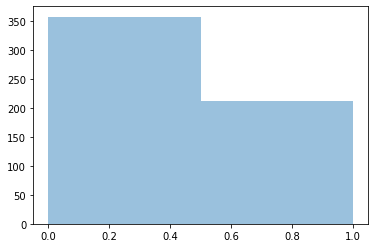

In [8]:
# some graphs
plt.hist(df.diagnosis, bins = 2, alpha = 0.45)

In [9]:
#Separating the data into train, validation and test

# train data = 60%
end_test = 341
arr = [i for i in range(31)]
x_train = df.iloc[0:end_test, arr[1:31]]
y_train = df.iloc[0:end_test, 0]
y_train = y_train.to_numpy()


# cross validation data 20%
end_cv = 113
x_cv = df.iloc[end_test:end_test + end_cv, arr[1:31]]
y_cv = df.iloc[end_test:end_test + end_cv, 0]
y_cv = y_cv.to_numpy()


# test data 20%
x_test = df.iloc[454: 454 + end_cv+2, arr[1:31]]
y_test = df.iloc[454: 454 + end_cv+2, 0]
y_test = y_test.to_numpy()

In [40]:
# Applying SVM

parameters = {
   'C': [1, 0.5, 0.1, 0.35, 0.25, 0.2, 0.15, 10, 100, 150, 200, 500, 700, 550, 750, 1000, 1500, 10000],
   'gamma': [1, 0.5, 0.35, 0.3, 0.25, 0.1, 0.005, 0.001, 0.0005, 0.0025, 0.003, 0.0009],
   'kernel': ['rbf', 'linear']} # check for the best parameters to fit

svc = svm.SVC()
clf = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)

clf.fit(x_train, y_train.ravel())
print(clf.best_params_)

y_pred_train = clf.predict(x_train)
y_pred_cv = clf.predict(x_cv)
y_pred_test = clf.predict(x_test)

print("Train Accuracy:", metrics.accuracy_score(y_train.ravel(), y_pred_train))
print("Validation Accuracy:", metrics.accuracy_score(y_cv.ravel(), y_pred_cv))
print("Test Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred_test))



Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.3s
[CV 2/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.4s
[CV 3/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV 4/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.7s
[CV 5/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.3s
[CV 1/5] END .....................C=1, gamma=0.5, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=1, gamma=

[CV 1/5] END ................C=1, gamma=0.003, kernel=linear; total time=   0.3s
[CV 2/5] END ................C=1, gamma=0.003, kernel=linear; total time=   0.4s
[CV 3/5] END ................C=1, gamma=0.003, kernel=linear; total time=   0.1s
[CV 4/5] END ................C=1, gamma=0.003, kernel=linear; total time=   0.7s
[CV 5/5] END ................C=1, gamma=0.003, kernel=linear; total time=   0.3s
[CV 1/5] END ..................C=1, gamma=0.0009, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.0009, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.0009, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.0009, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1, gamma=0.0009, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1, gamma=0.0009, kernel=linear; total time=   0.4s
[CV 2/5] END ...............C=1, gamma=0.0009, kernel=linear; total time=   0.5s
[CV 3/5] END ...............

[CV 4/5] END .............C=0.5, gamma=0.0005, kernel=linear; total time=   0.0s
[CV 5/5] END .............C=0.5, gamma=0.0005, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.5, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.5, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=0.5, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=0.5, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=0.5, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=0.5, gamma=0.0025, kernel=linear; total time=   0.0s
[CV 2/5] END .............C=0.5, gamma=0.0025, kernel=linear; total time=   0.0s
[CV 3/5] END .............C=0.5, gamma=0.0025, kernel=linear; total time=   0.0s
[CV 4/5] END .............C=0.5, gamma=0.0025, kernel=linear; total time=   0.0s
[CV 5/5] END .............C=0.5, gamma=0.0025, kernel=linear; total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=0.1, gamma=0.0005, kernel=linear; total time=   0.0s
[CV 2/5] END .............C=0.1, gamma=0.0005, kernel=linear; total time=   0.0s
[CV 3/5] END .............C=0.1, gamma=0.0005, kernel=linear; total time=   0.0s
[CV 4/5] END .............C=

[CV 4/5] END ...............C=0.35, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=0.35, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.35, gamma=0.005, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.35, gamma=0.005, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=0.35, gamma=0.005, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=0.35, gamma=0.005, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=0.35, gamma=0.005, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=0.35, gamma=0.005, kernel=linear; total time=   0.1s
[CV 2/5] END .............C=0.35, gamma=0.005, kernel=linear; total time=   0.1s
[CV 3/5] END .............C=0.35, gamma=0.005, kernel=linear; total time=   0.1s
[CV 4/5] END .............C=0.35, gamma=0.005, kernel=linear; total time=   0.0s
[CV 5/5] END .............C=0.35, gamma=0.005, kernel=linear; total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ..............C=0.25, gamma=0.25, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.25, gamma=0.25, kernel=linear; total time=   0.1s
[CV 3/5] END ..............C=0.25, gamma=0.25, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.25, gamma=0.25, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.25, gamma=0.25, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0.25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=0.25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=0.25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=0.25, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=0.25, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=0.25, gamma=0.1, kernel=linear; total time=   0.1s
[CV 3/5] END ...............

[CV 4/5] END ...............C=0.2, gamma=0.35, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=0.2, gamma=0.35, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=0.2, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.2, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.2, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.2, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.2, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=0.2, gamma=0.3, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=0.2, gamma=0.3, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=0.2, gamma=0.3, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=0.2, gamma=0.3, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=0.2, gamma=0.3, kernel=linear; total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ..................C=0.15, gamma=0.5, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.15, gamma=0.5, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=0.15, gamma=0.5, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=0.15, gamma=0.5, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=0.15, gamma=0.5, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=0.15, gamma=0.5, kernel=linear; total time=   0.1s
[CV 2/5] END ...............C=0.15, gamma=0.5, kernel=linear; total time=   0.0s
[CV 3/5] END ...............C=0.15, gamma=0.5, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=0.15, gamma=0.5, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=0.15, gamma=0.5, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=0.15, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.15, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ............C=0.15, gamma=0.0009, kernel=linear; total time=   0.1s
[CV 2/5] END ............C=0.15, gamma=0.0009, kernel=linear; total time=   0.0s
[CV 3/5] END ............C=0.15, gamma=0.0009, kernel=linear; total time=   0.0s
[CV 4/5] END ............C=0.15, gamma=0.0009, kernel=linear; total time=   0.0s
[CV 5/5] END ............C=0.15, gamma=0.0009, kernel=linear; total time=   0.0s
[CV 1/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=10, gamma=1, kernel=linear; total time=   1.7s
[CV 2/5] END ...................C=10, gamma=1, kernel=linear; total time=   4.2s
[CV 3/5] END ...............

[CV 3/5] END ..............C=10, gamma=0.0025, kernel=linear; total time=   1.3s
[CV 4/5] END ..............C=10, gamma=0.0025, kernel=linear; total time=   1.4s
[CV 5/5] END ..............C=10, gamma=0.0025, kernel=linear; total time=   0.8s
[CV 1/5] END ..................C=10, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=10, gamma=0.003, kernel=linear; total time=   1.7s
[CV 2/5] END ...............C=10, gamma=0.003, kernel=linear; total time=   4.2s
[CV 3/5] END ...............C=10, gamma=0.003, kernel=linear; total time=   1.3s
[CV 4/5] END ...............C=10, gamma=0.003, kernel=linear; total time=   1.3s
[CV 5/5] END ...............

[CV 5/5] END ..............C=100, gamma=0.001, kernel=linear; total time=   0.7s
[CV 1/5] END ................C=100, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=100, gamma=0.0005, kernel=linear; total time=   1.0s
[CV 2/5] END .............C=100, gamma=0.0005, kernel=linear; total time=   5.4s
[CV 3/5] END .............C=100, gamma=0.0005, kernel=linear; total time=   5.2s
[CV 4/5] END .............C=100, gamma=0.0005, kernel=linear; total time=   3.3s
[CV 5/5] END .............C=100, gamma=0.0005, kernel=linear; total time=   0.7s
[CV 1/5] END ................C=100, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ..............C=150, gamma=0.005, kernel=linear; total time=   2.2s
[CV 2/5] END ..............C=150, gamma=0.005, kernel=linear; total time=   3.3s
[CV 3/5] END ..............C=150, gamma=0.005, kernel=linear; total time=   5.1s
[CV 4/5] END ..............C=150, gamma=0.005, kernel=linear; total time=   8.2s
[CV 5/5] END ..............C=150, gamma=0.005, kernel=linear; total time=   0.7s
[CV 1/5] END .................C=150, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=150, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=150, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=150, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=150, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=150, gamma=0.001, kernel=linear; total time=   2.2s
[CV 2/5] END ..............C=150, gamma=0.001, kernel=linear; total time=   3.4s
[CV 3/5] END ..............C

[CV 3/5] END ...............C=200, gamma=0.25, kernel=linear; total time=   1.3s
[CV 4/5] END ...............C=200, gamma=0.25, kernel=linear; total time=   6.9s
[CV 5/5] END ...............C=200, gamma=0.25, kernel=linear; total time=   0.8s
[CV 1/5] END ...................C=200, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=200, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=200, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=200, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=200, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=200, gamma=0.1, kernel=linear; total time=   2.2s
[CV 2/5] END ................C=200, gamma=0.1, kernel=linear; total time=   4.8s
[CV 3/5] END ................C=200, gamma=0.1, kernel=linear; total time=   1.3s
[CV 4/5] END ................C=200, gamma=0.1, kernel=linear; total time=   6.9s
[CV 5/5] END ...............

[CV 5/5] END ...............C=500, gamma=0.35, kernel=linear; total time=   0.4s
[CV 1/5] END ...................C=500, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=500, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=500, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=500, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=500, gamma=0.3, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=500, gamma=0.3, kernel=linear; total time=   1.8s
[CV 2/5] END ................C=500, gamma=0.3, kernel=linear; total time=   3.2s
[CV 3/5] END ................C=500, gamma=0.3, kernel=linear; total time=   1.7s
[CV 4/5] END ................C=500, gamma=0.3, kernel=linear; total time=  13.5s
[CV 5/5] END ................C=500, gamma=0.3, kernel=linear; total time=   0.4s
[CV 1/5] END ..................C=500, gamma=0.25, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ................C=700, gamma=0.5, kernel=linear; total time=   2.2s
[CV 2/5] END ................C=700, gamma=0.5, kernel=linear; total time=   3.4s
[CV 3/5] END ................C=700, gamma=0.5, kernel=linear; total time=   2.6s
[CV 4/5] END ................C=700, gamma=0.5, kernel=linear; total time=  14.0s
[CV 5/5] END ................C=700, gamma=0.5, kernel=linear; total time=   0.5s
[CV 1/5] END ..................C=700, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=700, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=700, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=700, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=700, gamma=0.35, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=700, gamma=0.35, kernel=linear; total time=   2.1s
[CV 2/5] END ...............C=700, gamma=0.35, kernel=linear; total time=   3.4s
[CV 3/5] END ...............

[CV 3/5] END .............C=700, gamma=0.0009, kernel=linear; total time=   2.5s
[CV 4/5] END .............C=700, gamma=0.0009, kernel=linear; total time=  14.0s
[CV 5/5] END .............C=700, gamma=0.0009, kernel=linear; total time=   0.4s
[CV 1/5] END .....................C=550, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=550, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=550, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=550, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=550, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=550, gamma=1, kernel=linear; total time=   2.1s
[CV 2/5] END ..................C=550, gamma=1, kernel=linear; total time=   3.3s
[CV 3/5] END ..................C=550, gamma=1, kernel=linear; total time=   2.0s
[CV 4/5] END ..................C=550, gamma=1, kernel=linear; total time=  13.5s
[CV 5/5] END ...............

[CV 5/5] END .............C=550, gamma=0.0025, kernel=linear; total time=   0.5s
[CV 1/5] END .................C=550, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=550, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=550, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=550, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=550, gamma=0.003, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=550, gamma=0.003, kernel=linear; total time=   2.2s
[CV 2/5] END ..............C=550, gamma=0.003, kernel=linear; total time=   3.4s
[CV 3/5] END ..............C=550, gamma=0.003, kernel=linear; total time=   2.1s
[CV 4/5] END ..............C=550, gamma=0.003, kernel=linear; total time=  14.1s
[CV 5/5] END ..............C=550, gamma=0.003, kernel=linear; total time=   0.5s
[CV 1/5] END ................C=550, gamma=0.0009, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END .............C=750, gamma=0.0005, kernel=linear; total time=   2.1s
[CV 2/5] END .............C=750, gamma=0.0005, kernel=linear; total time=   3.3s
[CV 3/5] END .............C=750, gamma=0.0005, kernel=linear; total time=   3.3s
[CV 4/5] END .............C=750, gamma=0.0005, kernel=linear; total time=  14.1s
[CV 5/5] END .............C=750, gamma=0.0005, kernel=linear; total time=   0.4s
[CV 1/5] END ................C=750, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=750, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=750, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=750, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=750, gamma=0.0025, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=750, gamma=0.0025, kernel=linear; total time=   2.1s
[CV 2/5] END .............C=750, gamma=0.0025, kernel=linear; total time=   3.5s
[CV 3/5] END .............C=

[CV 3/5] END .............C=1000, gamma=0.005, kernel=linear; total time=   2.8s
[CV 4/5] END .............C=1000, gamma=0.005, kernel=linear; total time=  15.4s
[CV 5/5] END .............C=1000, gamma=0.005, kernel=linear; total time=   0.5s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=1000, gamma=0.001, kernel=linear; total time=   2.0s
[CV 2/5] END .............C=1000, gamma=0.001, kernel=linear; total time=   3.6s
[CV 3/5] END .............C=1000, gamma=0.001, kernel=linear; total time=   2.9s
[CV 4/5] END .............C=1000, gamma=0.001, kernel=linear; total time=  15.1s
[CV 5/5] END .............C=

[CV 5/5] END ..............C=1500, gamma=0.25, kernel=linear; total time=   1.7s
[CV 1/5] END ..................C=1500, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1500, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1500, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1500, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1500, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1500, gamma=0.1, kernel=linear; total time=   2.2s
[CV 2/5] END ...............C=1500, gamma=0.1, kernel=linear; total time=   4.0s
[CV 3/5] END ...............C=1500, gamma=0.1, kernel=linear; total time=   2.0s
[CV 4/5] END ...............C=1500, gamma=0.1, kernel=linear; total time=  16.3s
[CV 5/5] END ...............C=1500, gamma=0.1, kernel=linear; total time=   1.9s
[CV 1/5] END ................C=1500, gamma=0.005, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ..............C=10000, gamma=0.3, kernel=linear; total time=   2.8s
[CV 2/5] END ..............C=10000, gamma=0.3, kernel=linear; total time=   4.6s
[CV 3/5] END ..............C=10000, gamma=0.3, kernel=linear; total time=   3.8s
[CV 4/5] END ..............C=10000, gamma=0.3, kernel=linear; total time=  18.4s
[CV 5/5] END ..............C=10000, gamma=0.3, kernel=linear; total time=   2.0s
[CV 1/5] END ................C=10000, gamma=0.25, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=10000, gamma=0.25, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=10000, gamma=0.25, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=10000, gamma=0.25, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=10000, gamma=0.25, kernel=rbf; total time=   0.0s
[CV 1/5] END .............C=10000, gamma=0.25, kernel=linear; total time=   2.8s
[CV 2/5] END .............C=10000, gamma=0.25, kernel=linear; total time=   4.8s
[CV 3/5] END .............C=

In [10]:
# After getting the best parameters we shuffle the data and run the test 4 times to get the average
df = df.sample(frac=1)
# train data = 60%
end_test = 341
arr = [i for i in range(31)]
x_train = df.iloc[0:end_test, arr[1:31]]
y_train = df.iloc[0:end_test, 0]
y_train = y_train.to_numpy()


# cross validation data 20%
end_cv = 113
x_cv = df.iloc[end_test:end_test + end_cv, arr[1:31]]
y_cv = df.iloc[end_test:end_test + end_cv, 0]
y_cv = y_cv.to_numpy()


# test data 20%
x_test = df.iloc[454: 454 + end_cv+2, arr[1:31]]
y_test = df.iloc[454: 454 + end_cv+2, 0]
y_test = y_test.to_numpy()

clf = svm.SVC(C=750, kernel='linear', gamma=1)
clf.fit(x_train, y_train.ravel())

y_pred_train = clf.predict(x_train)
y_pred_cv = clf.predict(x_cv)
y_pred_test = clf.predict(x_test)

print("Train Accuracy:", metrics.accuracy_score(y_train.ravel(), y_pred_train))
print("Validation Accuracy:", metrics.accuracy_score(y_cv.ravel(), y_pred_cv))
print("Test Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred_test))

Train Accuracy: 0.9765395894428153
Validation Accuracy: 0.9646017699115044
Test Accuracy: 0.9478260869565217


In [49]:
"""

                                        SECOND RESEARCH QUESTION
--> IN THIS PART WE WILL CHECK WHICH OF THE PARAMETERS PLAYS A CRUCIAL ROLE IN DETERMING WHEATHER A PERASON HAS BREAST CANCER OR NOT
--> THE WAY TO IMPLEMENT THIS IS BY REMOVING EACH ELEMENT ONE BY ONE AND RUN THE SVM TEST

"""


# After getting the best parameters we shuffle the data and run the test 4 times to get the average
df = df.sample(frac=1)
# train data = 60%
end_test = 341
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30]
x_train = df.iloc[0:end_test, arr]
y_train = df.iloc[0:end_test, 0]
y_train = y_train.to_numpy()


# cross validation data 20%
end_cv = 113
x_cv = df.iloc[end_test:end_test + end_cv, arr]
y_cv = df.iloc[end_test:end_test + end_cv, 0]
y_cv = y_cv.to_numpy()


# test data 20%
x_test = df.iloc[454: 454 + end_cv+2, arr]
y_test = df.iloc[454: 454 + end_cv+2, 0]
y_test = y_test.to_numpy()

clf = svm.SVC(C=750, kernel='linear', gamma=1)
clf.fit(x_train, y_train.ravel())

y_pred_train = clf.predict(x_train)
y_pred_cv = clf.predict(x_cv)
y_pred_test = clf.predict(x_test)

print("Train Accuracy:", metrics.accuracy_score(y_train.ravel(), y_pred_train))
print("Validation Accuracy:", metrics.accuracy_score(y_cv.ravel(), y_pred_cv))
print("Test Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred_test))









Train Accuracy: 0.9589442815249267
Validation Accuracy: 0.9469026548672567
Test Accuracy: 0.9739130434782609
